# IMPORT DATASET

Dataset menggunakan sumber dari kaggle.com
link: https://www.kaggle.com/datasets/data855/heart-disease

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("data855/heart-disease")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/data855/heart-disease/versions/1


# EDA

In [ ]:
import pandas as pd

df = pd.read_csv(path + "/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


Berdasarkan tipe data tersebut, terdapat data yang merupakan data kategorikal tetapi pada dataset yang tersedia, menggunakan tipe data int64. Hal ini mengindikasikan bahwa dataset sudah di-encode. Untuk itu, perlu dilakukan eksplorasi data lebih lanjut untuk melihat data kategorikal yang telah ter-encode tersebut masuk ke dalam kategori apa saja.

Beberapa penjelasan kategori di dalam dataset:
1. Age: Age in years
2. Sex:
  - 1: Male
  - 0: Female
3. cp (chest pain):
  - 0: typical angina
  - 1: atypical angina
  - 2: non-anginal pain
  - 3: asympotimatic
4. trestbps: resting blood pressure (in mmHg on admission to the hospital)
5. chol: cholesterol (in mg/dl)
6. fbs (fasting blood sugar): >120 mg/dl
  - 0: yes
  - 1: no
7. restecg (resting electrocardiographic results):
  - 0: normal
  - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: Maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise relative to rest
  - 0: upsloping
  - 1: flat
  - 2: downsloping
12. ca: number of major vessels (0-3) numbered by fluorosopy
13. thal:
  - 0: error (in the original dataset 0 maps to NaN's)
  - 1: fixed defect
  - 2: normal
  - 3: reversable defect
14. Target: the label
  - 0: no disease
  - 1: disease




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Berdasarkan hasil statistika deskriptif tersebut, dapat dilihat bahwa:

> Terdapat satu parameter yang tidak sesuai dengan kategori yang ditentukan. Pada kolom ca, nilai maksimumnya sebesar 4. Sementara kategori yang ada hanya dari 0-3. Sehingga, perlu dilakukan penanganan untuk kolom tersebut.


> Pada kolom thal, nilai minimum yang diperoleh yaitu 0. Nilai 0 pada kolom thal mengindikasikan terdapat nilai NaN pada kolom tersebut. Sehingga, perlu dilakukan penanganan pada kolom ini.





**Target Label**
Diagnosis of heart disease (angiographic disease status):
- 0: <50% diameter narrowing
- 1: >50% diameter narrowing


# Preprocessing Data

### Drop faulty data

In [ ]:
df = df[df['thal']>0] #drop data thal < 0
df = df[df['ca']<4] #drop data ca > 3

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    int64  
 12  thal      296 non-null    int64  
 13  target    296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


### Rename Column

In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Change Encoded Data
data yang telah di-encode diubah menjadi kategorikal

In [ ]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

<ipython-input-10-46b099dd5154>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['sex'][df['sex'] == 0] = 'female'
<ipython-input-10-46b099dd5154>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an err

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      296 non-null    int64  
 1   sex                      296 non-null    object 
 2   chest_pain_type          296 non-null    object 
 3   resting_blood_pressure   296 non-null    int64  
 4   cholesterol              296 non-null    int64  
 5   fasting_blood_sugar      296 non-null    object 
 6   rest_ecg                 296 non-null    object 
 7   max_heart_rate_achieved  296 non-null    int64  
 8   exercise_induced_angina  296 non-null    object 
 9   st_depression            296 non-null    float64
 10  st_slope                 296 non-null    object 
 11  num_major_vessels        296 non-null    int64  
 12  thalassemia              296 non-null    object 
 13  target                   296 non-null    int64  
dtypes: float64(1), int64(6), object

In [ ]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'rest_ecg', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

### Exploring Features or Target

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<ipython-input-15-cbf49ac41209>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['target'], palette=mypal[1::4])


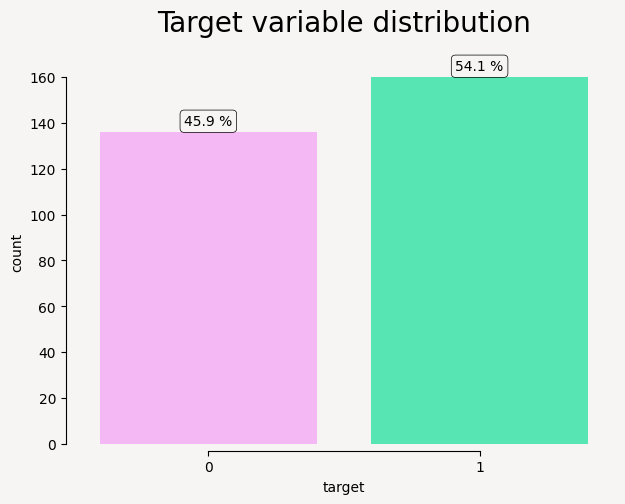

In [ ]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

`Berdasarkan plot tersebut, dapat dilihat bahwa kolom target sudah balance. Dengan target bernilai 0 sebanyak 45,9% dan target bernilai 1 sebanyak 54,1%`

In [ ]:
df.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,0.679054,0.540541
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.939726,0.499198
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,0.000000,1.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,1.000000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,3.000000,1.000000


1. General Observations:

    Sample Size: The dataset contains 296 samples.
    Target Variable: The target column seems to indicate the presence (1) or absence (0) of heart disease.
    Continuous variables include: age, resting_blood_pressure, cholesterol, max_heart_rate_achieved, and st_depression.
    Discrete variables include: num_major_vessels and target.

2. Key Variables and Their Distribution:

a. Age:

    Mean Age: 54.52 years.
    Range: 29–77 years, indicating a focus on middle-aged and older adults.
    Spread: Standard deviation is 9.06, suggesting moderate variability.
    Interquartile Range (IQR): 48–61 years (majority of individuals are in this range).

b. Resting Blood Pressure (resting_blood_pressure):

    Mean: 131.60 mmHg, close to the upper threshold of normal blood pressure (120–130 mmHg).
    Range: 94–200 mmHg, with a significant spread.
    IQR: 120–140 mmHg, showing a concentration in the borderline hypertensive range.

c. Cholesterol:

    Mean: 247.16 mg/dL, above the desirable level (<200 mg/dL), suggesting that high cholesterol levels are common in the dataset.
    Range: 126–564 mg/dL, with a very high maximum value (possible outlier at 564).
    IQR: 211–275.25 mg/dL, indicating that many individuals have elevated cholesterol levels.

d. Maximum Heart Rate Achieved (max_heart_rate_achieved):

    Mean: 149.56 bpm.
    Range: 71–202 bpm, indicating individuals with varying levels of cardiac fitness or response to exercise.
    IQR: 133–166 bpm, typical of individuals with normal heart function during exercise.

e. ST Depression (st_depression):

    Mean: 1.06 units.
    Range: 0.0–6.2, indicating some cases with significant ST depression (a marker of ischemia).
    IQR: 0.0–1.65, with many individuals showing minimal depression.

f. Number of Major Vessels (num_major_vessels):

    Mean: 0.68.
    Range: 0–3, with a maximum outlier at 6.2 (likely erroneous or rare case).
    IQR: 0–1, indicating most individuals have 0–1 major vessels affected.

g. Target:

    Mean: 0.54, indicating slightly more individuals have heart disease (1) than not (0).
    Standard Deviation: 0.50, showing a balanced target distribution.

# Correlation

## For Numerical Features

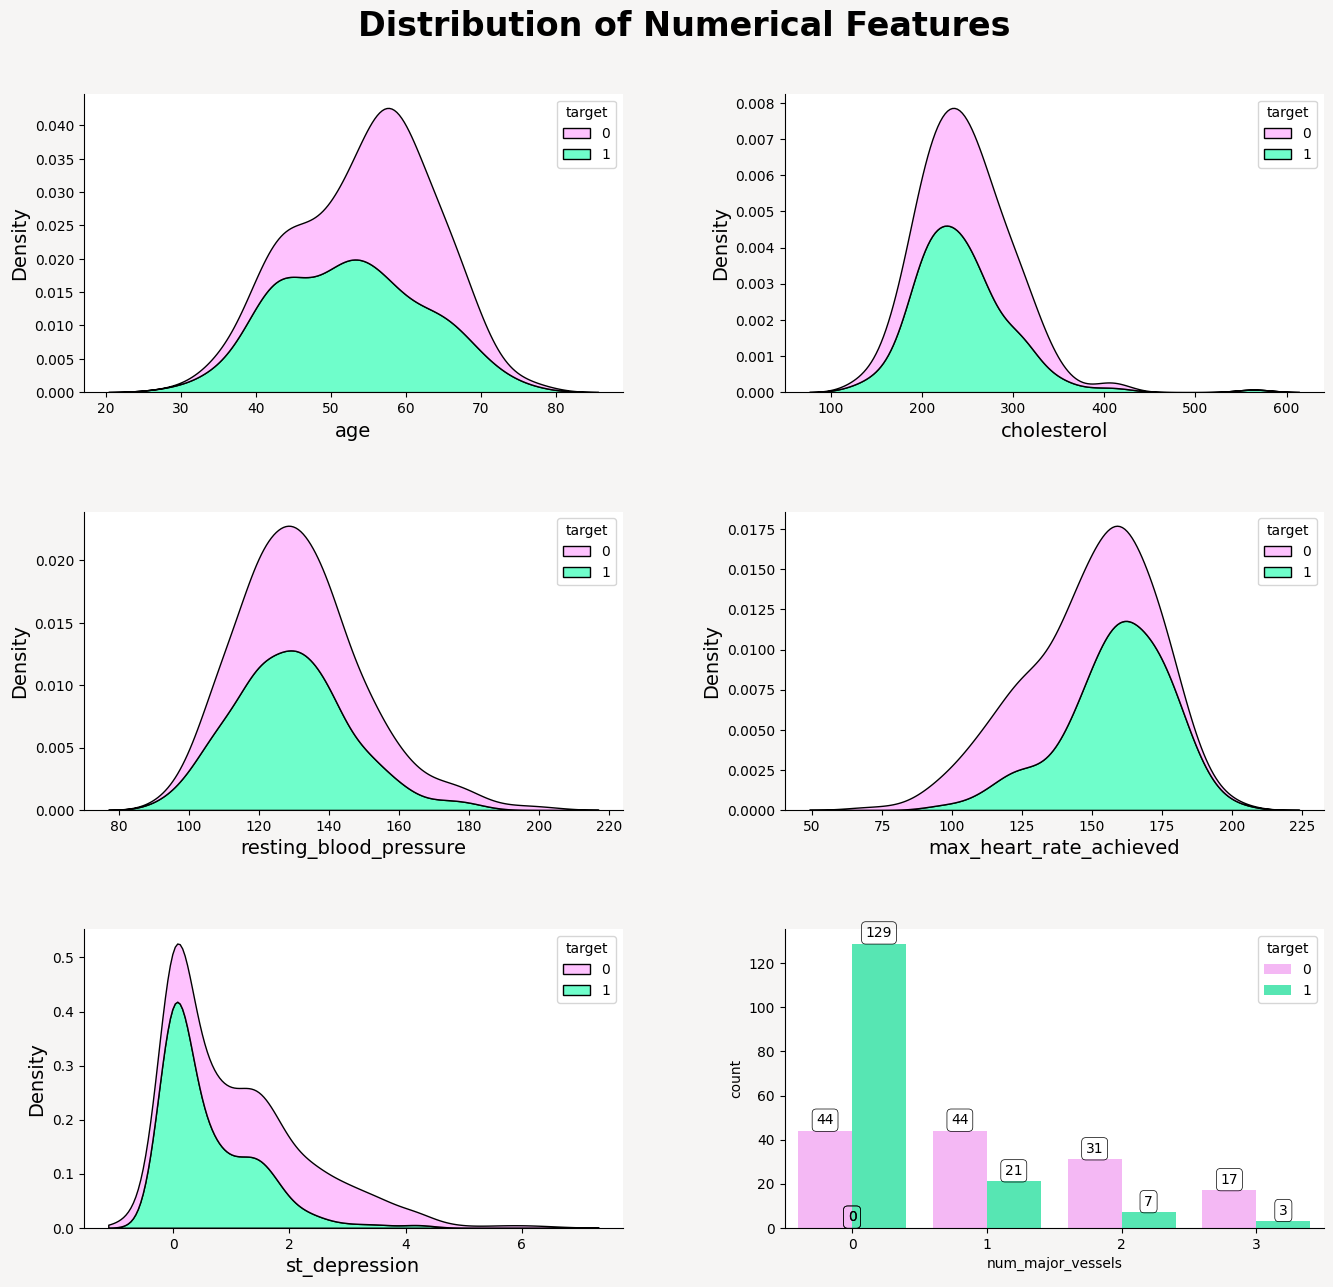

In [ ]:
L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

# Remove excess subplots if any
fig, axs = plt.subplots(nrow, ncol, figsize=(16, 14), facecolor='#F6F5F4')
fig.subplots_adjust(hspace=0.4, wspace=0.3, top=0.92)

i = 0
for r in range(nrow):
    for c in range(ncol):
        if i < L:
            col = num_feats[i]
            ax = axs[r, c]

            # General plot settings
            sns.kdeplot(data=df, x=col, hue="target", multiple="stack", palette=mypal[1::4], ax=ax)
            ax.set_xlabel(col, fontsize=14)
            ax.set_ylabel("Density", fontsize=14)
            sns.despine(ax=ax, right=True, offset=0, trim=False)

            # Specific handling for 'num_major_vessels'
            if col == 'num_major_vessels':
                ax.clear()  # Clear previous plot
                sns.countplot(data=df, x=col, hue="target", palette=mypal[1::4], ax=ax)
                for p in ax.patches:
                    height = p.get_height()
                    ax.text(p.get_x() + p.get_width() / 2., height + 3,
                            '{:1.0f}'.format(height), ha="center",
                            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

            i += 1
        else:
            axs[r, c].axis('off')  # Remove empty subplot

# Title for the entire figure
plt.suptitle('Distribution of Numerical Features', fontsize=24, fontweight='bold')
plt.show()

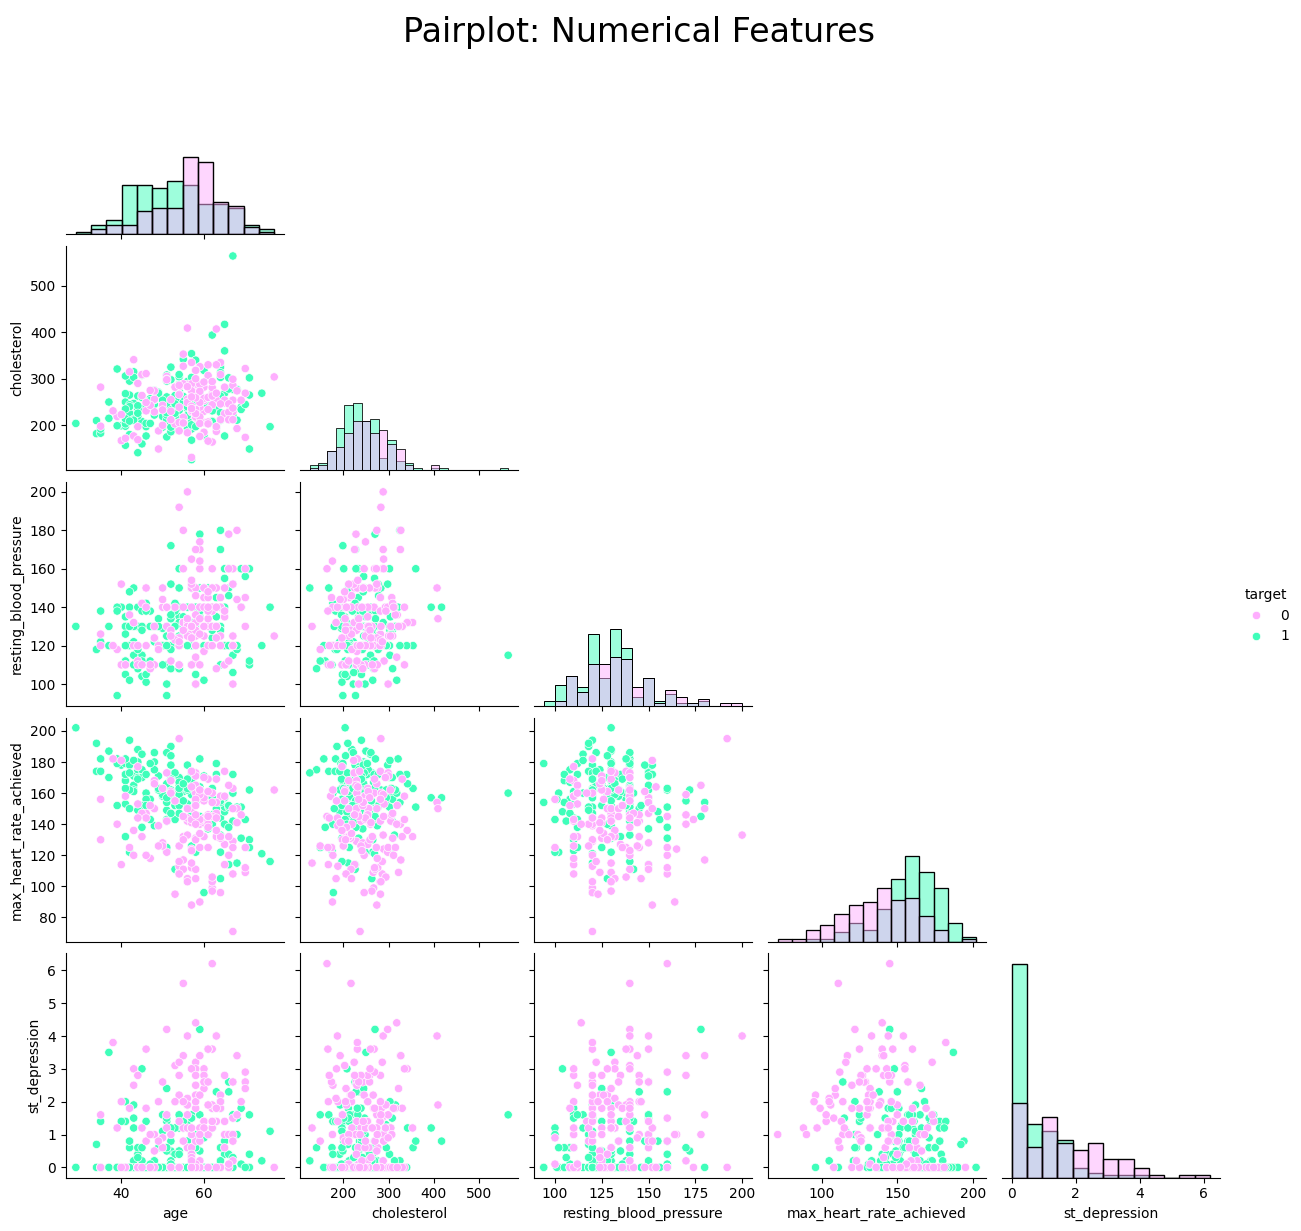

In [ ]:
#Pair Plot

_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = df[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

1. Tujuan Pairplot:

  Pairplot ini menunjukkan hubungan antar fitur numerik di dataset serta distribusi data untuk setiap fitur, dibedakan berdasarkan nilai target (0 atau 1).
2. Analisis Distribusi (Diagonal Plots):

    cholesterol: Distribusi terlihat agak miring ke kanan dengan beberapa outlier di nilai tinggi. Tidak ada perbedaan mencolok antara target 0 dan 1.
    resting_blood_pressure: Distribusi lebih simetris, dengan sebagian besar data berada di rentang 120–140 mmHg. Tidak ada perbedaan distribusi yang signifikan antara target 0 dan 1.
    max_heart_rate_achieved: Terlihat perbedaan mencolok, di mana individu dengan target 1 (penyakit jantung) cenderung memiliki denyut jantung maksimum lebih rendah dibandingkan target 0.
    st_depression: Distribusi untuk target 1 memiliki nilai lebih tinggi (lebih banyak individu dengan depresi ST yang signifikan), yang merupakan indikator kuat risiko penyakit jantung.

3. Analisis Hubungan Antar Fitur (Off-Diagonal Plots):

    age vs cholesterol: Tidak terlihat korelasi yang signifikan. Sebaran data relatif acak untuk kedua nilai target.
    resting_blood_pressure vs max_heart_rate_achieved: Tampaknya terdapat hubungan negatif lemah, di mana individu dengan tekanan darah tinggi cenderung memiliki denyut jantung maksimum lebih rendah. Perbedaan target tidak begitu terlihat jelas.
    st_depression vs max_heart_rate_achieved: Pola signifikan terlihat di mana individu dengan nilai st_depression tinggi (indikator iskemia) cenderung memiliki denyut jantung maksimum lebih rendah dan lebih sering memiliki target 1.
    cholesterol vs max_heart_rate_achieved: Tidak ada hubungan signifikan. Penyebaran data seragam untuk kedua nilai target.

4. Insight Berdasarkan Target:

    Target 1 (Penyakit Jantung):
        Terlihat lebih sering muncul pada individu dengan:
            Denyut jantung maksimum yang lebih rendah.
            ST Depression yang lebih tinggi.
        Fitur ini menunjukkan adanya risiko jantung terkait dengan penurunan kinerja jantung saat aktivitas fisik.
    Target 0 (Tidak Ada Penyakit Jantung):
        Distribusi cenderung mendominasi pada nilai max_heart_rate_achieved yang lebih tinggi dan st_depression yang lebih rendah.

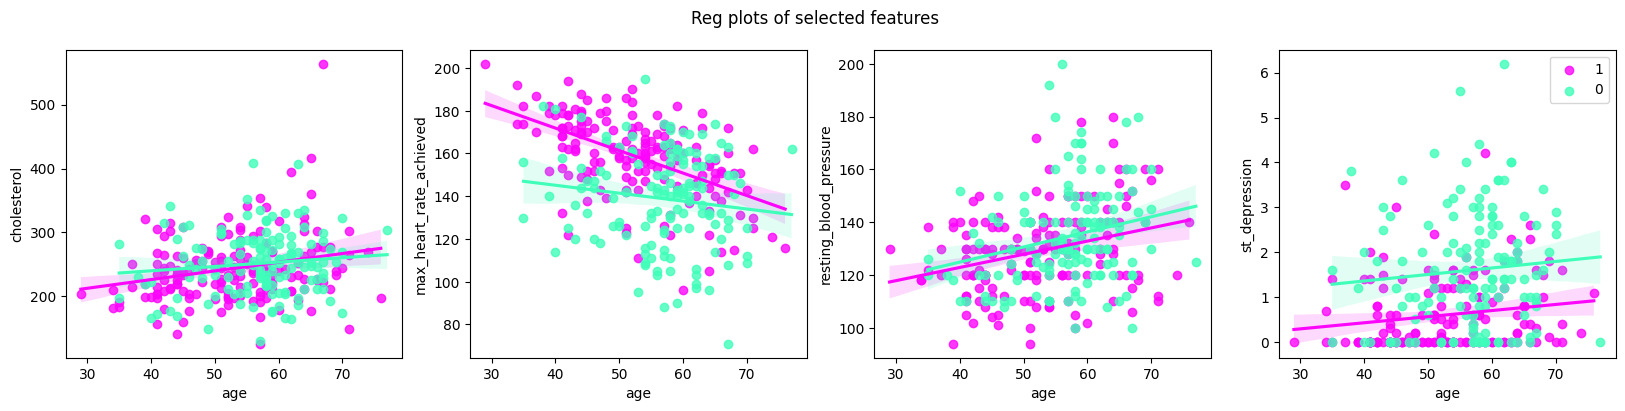

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=df[df['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=df[df['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=df[df['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

## For Categorical Features


1. Chest Pain:
  More than 75% of the patients experience either typical angina or non-angina chest pain.
  Patients who experienced atypical angina or non-angina chest pain are more likely to have a heart disease.
2. Resting Electrocardiogram:
    Patients with Left ventricular hypertrophy are the fewest (~ 1.4%). The rest is almost a 50-50 split between patients with ST-T abnormality and those with normal REC tests.
    ST-T abnormality seem to have a better correlation with the target, i.e the majority of patients with this kind of REC test ended up with a heart disease.
3. ST-Slope:
    Most patients have a downsloping or flat ST-Slope of their REC test.
    downsloping ST-Slopes are a strong indication that a patient might have a heart disease.
4. Thalassemia:
    Most patients have a normal or reversable defect
    Patients who have thalassemia defects (reversable + fixed) are less likely to have a heart disease. Whereas, those with normal thalassemia are more likely to have a heart condition. Sounds not intuitive.
5. Fasting blood sugar
    Patients with lower (less than 120mg/ml) fasting blood sugar are the majority in our dataset consisting of ~ 85% of the sample.
    Having lower resting blood sugar tends to increase the chances (~ 54%) of a heart disease.
6. Exercise Induced Angina
    Two-third of the patients showed no exercise induced angina.
    76% of the patients with exercise induced angina had no heart conditions. Whereas ~69% of the patients who did not experience exercise induced angina were diagnosed with heart condition.
7. Sex
    More patients in the sample data are male.
    Females seem to suffer from heart condition more than males.



# SVM Model

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

In [ ]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns a label-encoded dataframe.
    Converts all categorical features to string type to handle mixed data types.
    '''
    label_encoder = LabelEncoder()
    data_encoded = data.copy()

    for col in cat_features:
        if data_encoded[col].dtype == 'object' or isinstance(data_encoded[col].iloc[0], str):
            data_encoded[col] = label_encoder.fit_transform(data_encoded[col].astype(str))
        else:
            raise ValueError(f"Unexpected data type in column {col}. Ensure it is categorical or string.")

    return data_encoded


def score_summary(names, classifiers):
    '''
    Given a list of classifiers, this function calculates the accuracy,
    ROC_AUC and Recall and returns the values in a dataframe
    '''
    cols = ["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.decision_function(X_val)
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        cm = confusion_matrix(y_val, pred)
        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
        f1 = 2 * recall * precision / (recall + precision)

        df = pd.DataFrame([[name, accuracy * 100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)

    return np.round(data_table.reset_index(drop=True), 2)

def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in subplots.

    Args:
        names : list of names of the classifiers
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and columns in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    # Ensure `axes` is iterable
    if nrows * ncols == 1:
        axes = np.array([axes])

    for clf, ax, name in zip(classifiers, axes.flatten(), names):
        clf.fit(X_train, y_train)
        plot_confusion_matrix(clf, X_val, y_val, ax=ax)
        ax.title.set_text(name)

    plt.tight_layout()
    plt.show()


def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves
    '''
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred_proba = clf.decision_function(X_val)
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=3, label=f'{name} ROC curve (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=20)
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
# Split the data into features and target
cat_features = [col for col in df.columns if col != 'target' and df[col].dtype == 'object']

# Apply label encoding only to categorical features
data = label_encode_cat_features(df, cat_features)

In [ ]:
# Use SVM as the classifier
names = 'Support Vector'
classifiers = [SVC(probability=True, random_state=42)]

In [1]:
#Model Training
from sklearn import svm
model = svm.SVC(kernel = 'linear')

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

# Model Evaluation

In [ ]:
# Evaluate the model
evaluation_df = score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)

# Print evaluation results
print("Model Evaluation Summary:")
evaluation_df

Model Evaluation Summary:


<ipython-input-24-68bb500650ec>:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_table = pd.concat([data_table, df], ignore_index=True)


,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,S,64.86,0.81,0.89,0.58,0.7


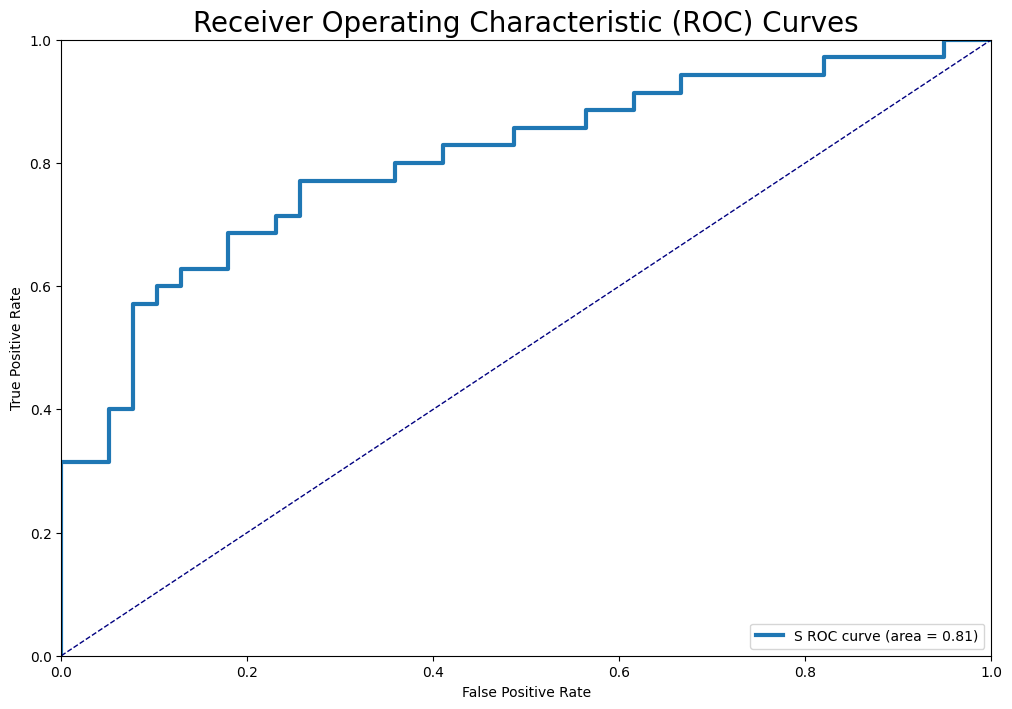

In [ ]:
# Plot confusion matrix
def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in subplots.

    Args:
        names : list of classifier names
        classifiers : list of classifiers
        nrows, ncols : number of rows and columns in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    axes = np.array(axes).flatten()  # Flatten axes to handle single-row/column subplots

    for clf, ax, name in zip(classifiers, axes, names):
        clf.fit(X_train, y_train)
        cm = confusion_matrix(y_val, clf.predict(X_val))
        display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        display.plot(ax=ax, colorbar=False)
        ax.set_title(f"Confusion Matrix: {name}")

    plt.tight_layout()
    plt.show()


# Plot ROC-AUC curve
roc_auc_curve(names, classifiers)

In [ ]:
#Finding the accuracy score on training dataset
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', train_data_accuracy)

Accuracy score of the training data :  0.8648648648648649


In [ ]:
#Finding the accuracy score on test dataset
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_val)
test_data_accuracy = accuracy_score(X_test_prediction, y_val)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7972972972972973


In [ ]:
#Predicting system
from sklearn.preprocessing import StandardScaler #Import the necessary library

data = (62,0,0,138,294,1,1,106,0,1.9,1,3,2)
data_array = np.asarray(data)
data_reshape = data_array.reshape(1, -1)

# Initialize the scaler and fit it to your training data
# Assuming you have your training data in X_train
scaler = StandardScaler()  # Create a StandardScaler instance
scaler.fit(X_train)  # Fit the scaler on your training data to learn the scaling parameters

data_standard = scaler.transform(data_reshape)
prediction = model.predict(data_standard)
if(prediction[0] == 1):
    print('Heart Disease')
else:
    print('No Heart Disease')

No Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
